### Optimization using Discrete Event Simulation

This is a simple example showing the optimization of a traffic light controller. The intersection has four traffic lights: north, south, east, and west, respectively. North and south are green at the same time, and east and west are green at the same time. Furthermore, the arrival of cars may be random but the departure of a single care is always constant. Furthermore, there is a reaction time after switching from red to green until the first car departs. Finally, the traffic lights are supposed to be optimized for a variety of arrival rate scenarios to make sure that the average waiting is minimized.

## Conceptual Model
First, a simple conceptual model needs to be derived before the actual model can be implemented.

![Conceptual model, flow graph](Traffic_light_Flow_Graph.svg)

The figure shows one flow graph for the conceptual model of the described system.

![Conceptual model, sequence diagram](Traffic_light_Sequence_Diagram.svg)

The figure shows an exemplary sequence diagram for the system considered.

## Implementation
The model has been implemented in *traffic_light_model.py* and will be used in the following. In order to run a simulation, first some important python modules need to be imported. Then three parameters are set when running a simulation:
1. Arrival rate in average number of time steps between arrival of two cars,
2. Green duration which sets the number of time steps a traffic light is in green state,
3. Departure time which is the number of time steps required for a car to leave the waiting queue.

A simulation run returns an object ob type *Intersection* which is used for analysis of results (only a few data points are currently analysed).

In [1]:
import traffic_light_model as tlm
import pandas as pd
import numpy as np

The first example uses a setup which is quite stable and no excessively long waiting queues can be observed.

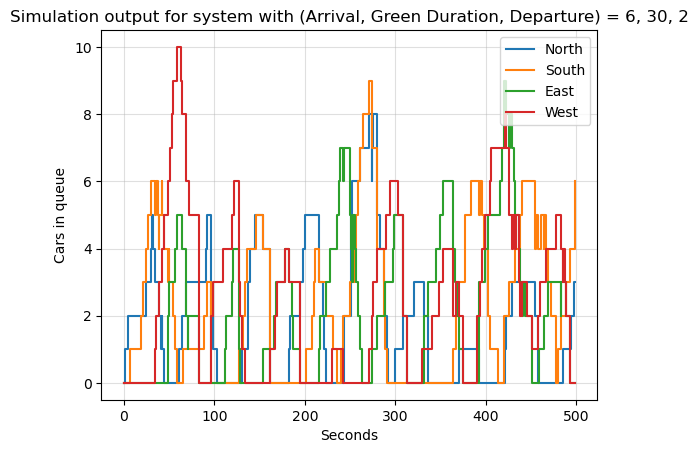

 Maximum queue length: 10
 Maximum waiting time: 33.480799267709756
 Average waiting time: 12.58967061792774


In [2]:
# First a simple example for traffic light without congestion
intersection = tlm.run(6, 30, 2)
tlm.step_graph(intersection)
print(" Maximum queue length: " + str(tlm.max_queue_length(intersection)))
print(" Maximum waiting time: " + str(tlm.max_waiting_time(intersection)))
print(" Average waiting time: " + str(tlm.mean_waiting_time(intersection)))

In the second example, intentionally, the arrival rate is too high and the qaiting queues cannot be emptied anymore. Hence, the waiting time is increasing and we would observe a traffic jam.

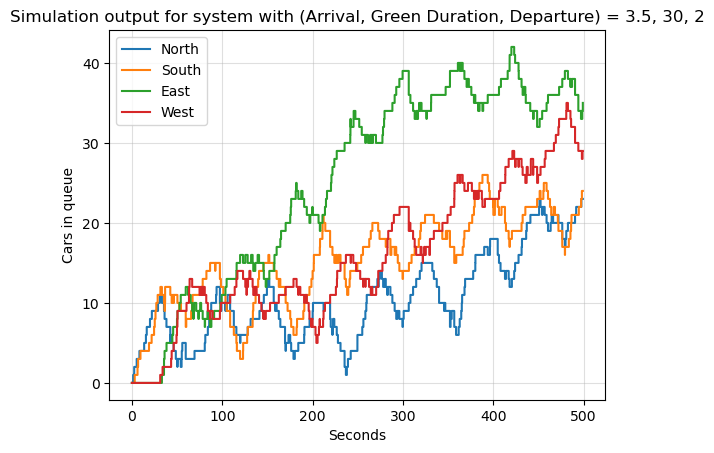

 Maximum queue length: 42
 Maximum waiting time: 165.09174018789975
 Average waiting time: 58.38124746624272


In [9]:
# Now for an unstable configuration with long waiting queues ...
intersection = tlm.run(3.5, 30, 2)
tlm.step_graph(intersection)
print(" Maximum queue length: " + str(tlm.max_queue_length(intersection)))
print(" Maximum waiting time: " + str(tlm.max_waiting_time(intersection)))
print(" Average waiting time: " + str(tlm.mean_waiting_time(intersection)))

## Optimization Problem

In order to optimize the green duration, we run multiple experiments for different arrival rates and green durations. The simulation run performs *num_rep* repetitions and each run is *length_rep* long. For each *green_duration* the average over each run and all repetitions is determined. The actual objective function is provided as last argument to the simulation function. 

In [11]:
import pandas as pd

# user inputs
num_rep = 100    # number of replications for each design point
length_rep = 1000 # length of one run
arrival_rate = np.arange(3.5,10,1)
green_duration = [4, 4.5, 5, 10, 20, 50, 60, 70, 80, 90, 100]

# initialize results data collection
results = tlm.run_experiments(arrival_rate, green_duration, num_rep, length_rep, tlm.mean_waiting_time) # this may take a few minutes to run
results = pd.DataFrame(results)

Green duration 4
Green duration 4.5
Green duration 5
Green duration 10
Green duration 20
Green duration 50
Green duration 60
Green duration 70
Green duration 80
Green duration 90
Green duration 100


Finally, we plot the results in order to identify the optimal *green_duration* for which the average waiting time is minimized over the arrival rates considered.

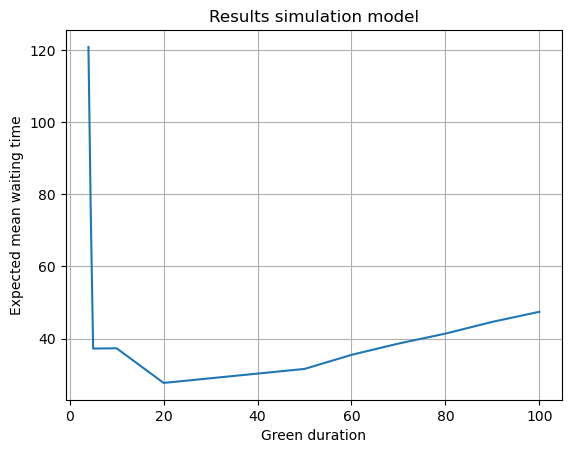

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# generate contour plot
plt.title('Results simulation model')
plt.xlabel('Green duration')
plt.ylabel('Expected mean waiting time')
handle = plt.plot(results.iloc[:, 0], results.iloc[:, 1], label = "Average waiting time")
plt.grid()
plt.savefig("Traffic_model_example.png")
plt.show()

Now, let's perform again the same experiment with different parameters, in particular, we use a different assumption on the arrival rate considered for the traffic light. Apparently, the optimal *green_duration* will change, which shows that any optimization must be clear about the requirements and side conditions of the system which is optimized.

Green duration 4
Green duration 4.5
Green duration 5
Green duration 10
Green duration 20
Green duration 50
Green duration 60
Green duration 70
Green duration 80
Green duration 90
Green duration 100


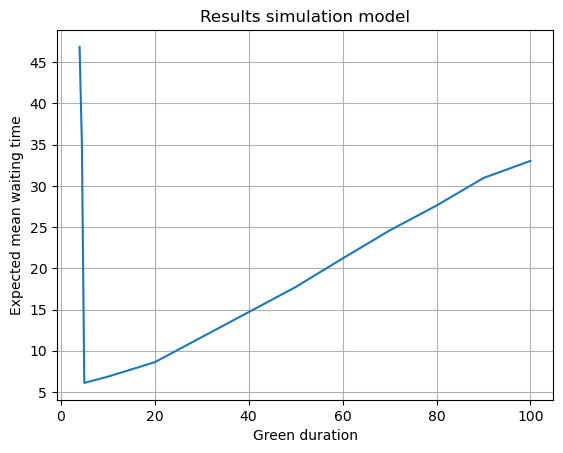

In [14]:
# user inputs
num_rep = 100    # number of replications for each design point
length_rep = 1000 # length of one run
arrival_rate = np.arange(6,12,1)
green_duration = [4, 4.5, 5, 10, 20, 50, 60, 70, 80, 90, 100]

# initialize results data collection
results = tlm.run_experiments(arrival_rate, green_duration, num_rep, length_rep, tlm.mean_waiting_time) # this may take a few minutes to run
results = pd.DataFrame(results)

# generate contour plot
plt.title('Results simulation model')
plt.xlabel('Green duration')
plt.ylabel('Expected mean waiting time')
handle = plt.plot(results.iloc[:, 0], results.iloc[:, 1], label = "Average waiting time")
plt.grid()
plt.savefig("Traffic_model_example_2.png")
plt.show()